# STATISTICAL ANALYSIS

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [2]:
gt = pd.read_csv('GlobalTemperatures.csv')
gt.dropna(inplace = True)
gt.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [3]:
print(gt.isnull().sum())

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64


In [4]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         1992 non-null   object 
 1   LandAverageTemperature                     1992 non-null   float64
 2   LandAverageTemperatureUncertainty          1992 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 155.6+ KB


In [5]:
columns = gt.columns
columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

## COVARIANCE

In [6]:
def covariance(a, b):
    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))

    return sum/(len(a)-1)

In [7]:
# this covariance is calculated without scaling the dataset
# but nan values have been dropped

cov_gt = np.zeros((8, 8), dtype = float)
x = 0
arr = np.array(gt[columns[1:]]).transpose()
# print(len(arr[0]))
for col1 in arr:
    y = 0
    for col2 in arr:
        cov_gt[x][y] = covariance(col1, col2)
        y += 1
    x += 1
    
print(cov_gt) # == np.cov(arr))
print("\n")
print(np.cov(arr))

[[ 1.81748118e+01 -1.36699347e-01  1.82955323e+01 -2.69670225e-01
   1.76393578e+01 -3.18273449e-01  5.36687949e+00 -4.12259185e-02]
 [-1.36699347e-01  5.01892292e-02 -1.28316115e-01  1.13270297e-01
  -1.53681120e-01  8.87657928e-02 -5.93726202e-02  1.60306914e-02]
 [ 1.82955323e+01 -1.28316115e-01  1.85724709e+01 -2.64779168e-01
   1.77917613e+01 -3.07457662e-01  5.40215576e+00 -3.82338955e-02]
 [-2.69670225e-01  1.13270297e-01 -2.64779168e-01  3.40125690e-01
  -2.98722006e-01  2.25874580e-01 -1.21412400e-01  3.69260475e-02]
 [ 1.76393578e+01 -1.53681120e-01  1.77917613e+01 -2.98722006e-01
   1.72709672e+01 -3.43721021e-01  5.22292154e+00 -4.73801407e-02]
 [-3.18273449e-01  8.87657928e-02 -3.07457662e-01  2.25874580e-01
  -3.43721021e-01  1.98771377e-01 -1.25960453e-01  2.88728675e-02]
 [ 5.36687949e+00 -5.93726202e-02  5.40215576e+00 -1.21412400e-01
   5.22292154e+00 -1.25960453e-01  1.62331286e+00 -1.90392615e-02]
 [-4.12259185e-02  1.60306914e-02 -3.82338955e-02  3.69260475e-02
  -

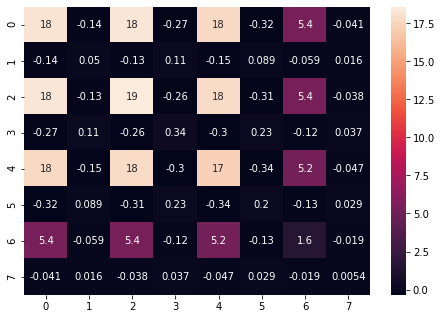

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.heatmap(pd.DataFrame(cov_gt), annot=True)
fig.savefig('covariance_heatmap_scratch.png', bbox_inches = 'tight')

## CORRELATION

In [13]:
def correlation(a, b):
    c = covariance(a, b)
    std_a = np.std(a)
    std_b = np.std(b)
    corrn = c/(std_a * std_b)
    return corrn

In [16]:
corr_gt = np.zeros((8, 8), dtype = float)
x = 0
arr = np.array(gt[columns[1:]]).transpose()
# print(len(arr[0]))
for col1 in arr:
    y = 0
    for col2 in arr:
        corr_gt[x][y] = correlation(col1, col2)
        y += 1
    x += 1
    
print(corr_gt) # == np.cov(arr))
print("\n")
print(np.array(gt[columns[1:]].corr()))

[[ 1.00050226 -0.14320042  0.99630732 -0.10851665  0.99611058 -0.16753541
   0.98856184 -0.13147814]
 [-0.14320042  1.00050226 -0.13297168  0.86737946 -0.16514864  0.88916329
  -0.20811238  0.97289321]
 [ 0.99630732 -0.13297168  1.00050226 -0.10540163  0.99390264 -0.16010011
   0.98434926 -0.12062349]
 [-0.10851665  0.86737946 -0.10540163  1.00050226 -0.12331254  0.86913811
  -0.16347837  0.86085754]
 [ 0.99611058 -0.16514864  0.99390264 -0.12331254  1.00050226 -0.18560468
   0.98689769 -0.15500874]
 [-0.16753541  0.88916329 -0.16010011  0.86913811 -0.18560468  1.00050226
  -0.22185757  0.88050368]
 [ 0.98856184 -0.20811238  0.98434926 -0.16347837  0.98689769 -0.22185757
   1.00050226 -0.20317355]
 [-0.13147814  0.97289321 -0.12062349  0.86085754 -0.15500874  0.88050368
  -0.20317355  1.00050226]]


[[ 1.         -0.14312853  0.99580716 -0.10846218  0.99561052 -0.1674513
   0.98806558 -0.13141214]
 [-0.14312853  1.         -0.13290493  0.86694403 -0.16506573  0.88871692
  -0.2080079   

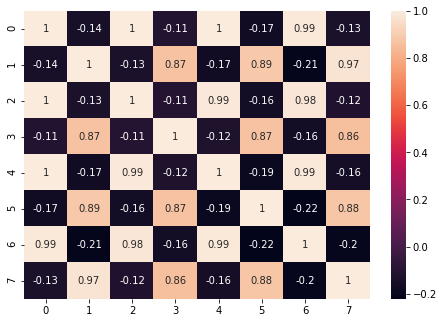

In [17]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.heatmap(pd.DataFrame(corr_gt), annot=True)
fig.savefig('correlation_heatmap_scratch.png', bbox_inches = 'tight')

## PCA

In [9]:
from sklearn.preprocessing import StandardScaler
gt_sdt = StandardScaler().fit_transform(gt[columns[1:]])
gt_scaled = pd.DataFrame(StandardScaler().fit_transform(gt[columns[1:]]))
gt_scaled

,0,1,2,3,4,5,6,7
0,-1.835373,3.698376,-1.417803,2.157970,-1.431984,5.362379,-1.868124,3.241448
1,-1.290574,4.457395,-1.016735,4.334431,-1.211756,2.672385,-1.275396,3.880310
2,-0.848775,3.028653,-0.929234,3.295081,-1.118852,2.194513,-0.918190,2.888035
3,-0.317819,1.733856,-0.328792,0.899087,-0.415327,2.012786,-0.428307,1.882167
4,0.336081,1.519544,0.302750,3.303656,0.256909,2.053170,0.231151,1.637496
...,...,...,...,...,...,...,...,...
1987,1.450784,-0.913782,1.473460,-0.634212,1.507032,-0.587466,1.865665,-0.972322
1988,1.038782,-0.882528,1.043148,-0.671944,1.072353,-0.455098,1.441728,-0.958730
1989,0.523077,-0.779837,0.487269,-0.721682,0.598924,-0.710860,0.845860,-0.904358
1990,-0.267140,-0.703935,-0.338541,-0.663369,-0.141185,-0.731052,0.030959,-0.890766


In [10]:
gt_arr = np.array(gt[columns[1:]])
mean = np.mean(gt_arr, axis=0)
mean
#nan values are ignored with sklearn so we can do the same

array([ 8.57158283,  0.27666265, 14.3506009 ,  0.47978163,  2.74359538,
        0.4318489 , 15.21256576,  0.12853213])

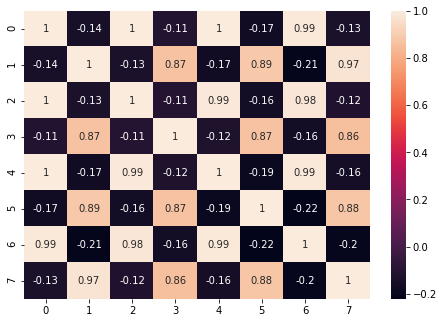

In [11]:
features = gt_sdt.T
cov_matrix = np.cov(features)
c = pd.DataFrame(cov_matrix)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.heatmap(c, annot=True)
fig.savefig('covariance_heatmap.png', bbox_inches = 'tight')

In [12]:
values, vectors = np.linalg.eig(cov_matrix)
print(values)
print("\n")
print(vectors)

[4.46651682e+00 3.18347024e+00 1.77453809e-01 1.25237144e-01
 2.83359905e-02 1.41197901e-02 3.17441376e-03 5.70987045e-03]


[[-3.88372578e-01 -3.19054038e-01  2.01405721e-02 -5.66399735e-04
  -6.47629246e-02  1.32165675e-01 -8.51609009e-01  8.08647040e-03]
 [ 3.15770271e-01 -3.97734760e-01  4.43170938e-01  1.25497688e-01
   7.13414434e-01  1.43846268e-01 -1.65687360e-02 -4.42959816e-03]
 [-3.85583349e-01 -3.22374208e-01  5.41976212e-02 -1.14395136e-02
  -1.02485868e-01  3.24679898e-01  3.49335574e-01 -7.11601274e-01]
 [ 2.92740257e-01 -3.95545763e-01 -6.90870158e-01  5.28252697e-01
  -1.58131824e-02  8.70233926e-03  2.25824450e-04 -3.41813592e-02]
 [-3.93463236e-01 -3.08970319e-01 -1.51996359e-02  4.55192278e-03
  -4.88713428e-02  3.57743364e-01  3.60706627e-01  6.99281260e-01]
 [ 3.16978937e-01 -3.77225813e-01 -2.78418184e-01 -8.23470327e-01
  -3.62137787e-02  1.65555572e-02 -3.92425707e-03  2.01284623e-03]
 [-4.03612418e-01 -2.86447544e-01 -4.93704194e-02 -3.46052614e-02
   2.253330

In [19]:
max_abs_idx = np.argmax(np.abs(vectors), axis=0)
# print(max_abs_idx)
signs = np.sign(vectors[max_abs_idx, range(vectors.shape[0])])
# print(signs)
vectors = vectors*signs[np.newaxis,:]
# print(vectors)
vectors = vectors.T
print(vectors)

[[ 3.88372578e-01  3.19054038e-01 -2.01405721e-02  5.66399735e-04
  -6.47629246e-02 -1.32165675e-01  8.51609009e-01 -8.08647040e-03]
 [-3.15770271e-01  3.97734760e-01 -4.43170938e-01 -1.25497688e-01
   7.13414434e-01 -1.43846268e-01  1.65687360e-02  4.42959816e-03]
 [ 3.85583349e-01  3.22374208e-01 -5.41976212e-02  1.14395136e-02
  -1.02485868e-01 -3.24679898e-01 -3.49335574e-01  7.11601274e-01]
 [-2.92740257e-01  3.95545763e-01  6.90870158e-01 -5.28252697e-01
  -1.58131824e-02 -8.70233926e-03 -2.25824450e-04  3.41813592e-02]
 [-3.93463236e-01 -3.08970319e-01 -1.51996359e-02  4.55192278e-03
   4.88713428e-02  3.57743364e-01  3.60706627e-01  6.99281260e-01]
 [-3.16978937e-01  3.77225813e-01  2.78418184e-01  8.23470327e-01
  -3.62137787e-02 -1.65555572e-02  3.92425707e-03 -2.01284623e-03]
 [ 4.03612418e-01  2.86447544e-01  4.93704194e-02  3.46052614e-02
   2.25333093e-01  8.24301453e-01 -1.45250595e-01 -8.01469359e-03]
 [ 3.11275683e-01 -3.99769727e-01  4.92716721e-01  1.60457508e-01
   

In [21]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), "\n", explained_variances)

1.0 
 [0.55803432420026, 0.39773401439058115, 0.02217059074192478, 0.015646784210716462, 0.003540220694728631, 0.0017640877331766233, 0.0003966025220495761, 0.0007133755065627644]


In [26]:
projected_1 = gt_scaled.dot(vectors.T[0])
projected_2 = gt_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=["PC1"])
res["PC2"] = projected_2
res["Date"] = gt['dt']
res.head()

,PC1,PC2,Date
0,-3.940393,1.916218,NaN
1,-3.246863,2.213719,NaN
2,-2.335905,1.693546,NaN
3,-1.122500,0.850327,NaN
4,-1.348568,2.222672,NaN


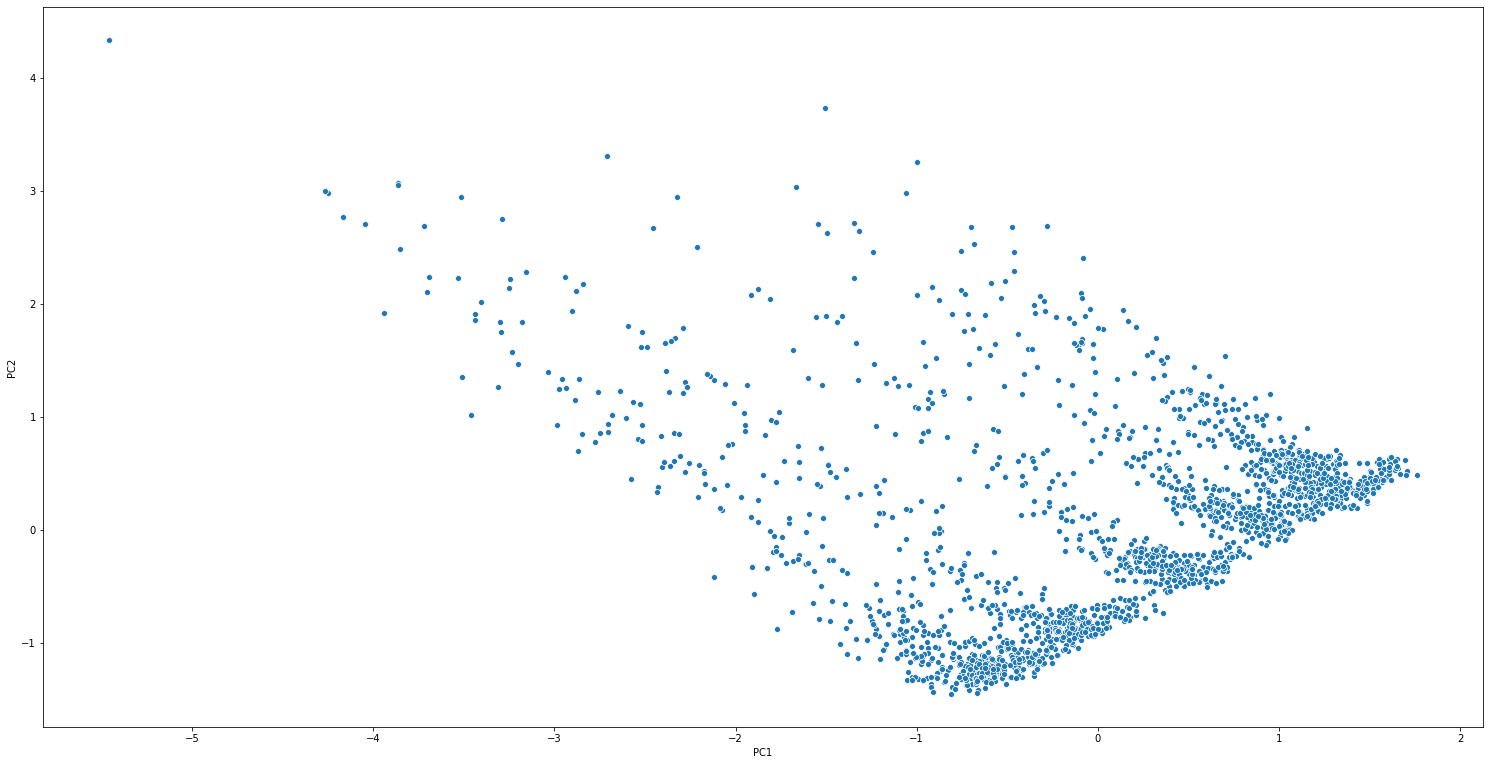

In [35]:
fig = plt.figure(figsize=(20, 10))
axes = fig.add_axes([0, 0, 1, 1])
sns.scatterplot(res['PC1'], res['PC2'], ax = axes)
fig.savefig('PCA_plot.png', bbox_inches = 'tight')

## LINEAR DISCRIMINANT ANALYSIS

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [37]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [41]:
height, width = X_train.shape
unique_classes = np.unique(Y_train)
num_classes = len(unique_classes)

scatter_t = np.cov(X_train.T)*(height - 1)
scatter_w = 0
for i in range(num_classes):
    class_items = np.flatnonzero(Y_train == unique_classes[i])
    scatter_w = scatter_w + np.cov(X_train[class_items].T) * (len(class_items)-1)
        
scatter_b = scatter_t - scatter_w
_, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
print(eig_vectors.shape)
pc = X.dot(eig_vectors[:,::-1][:,:3])
print(pc.shape)

(4, 4)
(150, 3)


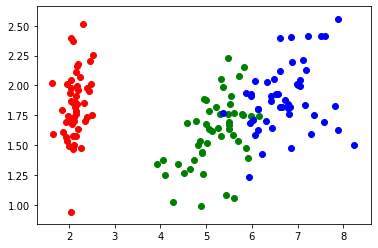

In [42]:
colors = ['r','g','b']
labels = np.unique(y)
for color, label in zip(colors, labels):
    class_data = pc[np.flatnonzero(y==label)]
    plt.scatter(class_data[:,0],class_data[:,1],c=color)

## MULTIVARIATE LINEAR REGRESSION

In [45]:
features = gt_sdt.T
cov_matrix = np.cov(features)
c = pd.DataFrame(cov_matrix)
c.columns = columns[1:]
c

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1.000502,-0.143200,0.996307,-0.108517,0.996111,-0.167535,0.988562,-0.131478
1,-0.143200,1.000502,-0.132972,0.867379,-0.165149,0.889163,-0.208112,0.972893
2,0.996307,-0.132972,1.000502,-0.105402,0.993903,-0.160100,0.984349,-0.120623
3,-0.108517,0.867379,-0.105402,1.000502,-0.123313,0.869138,-0.163478,0.860858
4,0.996111,-0.165149,0.993903,-0.123313,1.000502,-0.185605,0.986898,-0.155009
5,-0.167535,0.889163,-0.160100,0.869138,-0.185605,1.000502,-0.221858,0.880504
6,0.988562,-0.208112,0.984349,-0.163478,0.986898,-0.221858,1.000502,-0.203174
7,-0.131478,0.972893,-0.120623,0.860858,-0.155009,0.880504,-0.203174,1.000502


In [51]:
#How does landmaxtemtperature, landmintemperature, LandAndOceanAverageTemperature affect landAaveragetemperature?
#Multivariate linear regression

mlr = pd.DataFrame(gt[columns[1:9:2]])
mlrcolumns = mlr.columns
mlr

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
1200,0.749,8.242,-3.206,12.833
1201,3.071,9.970,-2.291,13.588
1202,4.954,10.347,-1.905,14.043
1203,7.217,12.934,1.018,14.667
1204,10.004,15.655,3.811,15.507
...,...,...,...,...
3187,14.755,20.699,9.005,17.589
3188,12.999,18.845,7.199,17.049
3189,10.801,16.450,5.232,16.290
3190,7.433,12.892,2.157,15.252


In [52]:
mlrcolumns

Index(['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature',
       'LandAndOceanAverageTemperature'],
      dtype='object')

In [59]:
X = mlr[mlrcolumns[1:]]
Y = mlr[mlrcolumns[0]]

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.41780318, -1.43198391, -1.86812372],
       [-1.01673525, -1.21175628, -1.2753965 ],
       [-0.92923375, -1.11885151, -0.91819002],
       ...,
       [ 0.48726947,  0.59892399,  0.8458604 ],
       [-0.33854053, -0.14118526,  0.0309586 ],
       [-0.84150014, -0.59126795, -0.34430446]])

In [63]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [67]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
         #print(iteration)
         # Hypothesis Values
        h = X.dot(B)
         # Difference b/w Hypothesis and Actual Y
        loss = h - Y
         # Gradient Calculation
        gradient = X.T.dot(loss) / m
         # Changing Values of B using Gradient
        B = B - alpha * gradient
         # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

In [103]:
m = 1500
f = 3
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = y[m:]
# X_train

In [104]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 2000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

In [105]:
# y_ = pred(X_test,newB)
y_ = (X_test)*(newB)
y_

array([[ 8.65240413, -2.2673518 , -1.78132691, -1.4350217 ],
       [ 8.65240413, -2.05787707, -1.72397502, -1.22223431],
       [ 8.65240413, -1.14654602, -1.03076513, -0.60821647],
       ...,
       [ 8.65240413,  0.81138574,  0.88642687,  0.97145939],
       [ 8.65240413, -0.56372701, -0.20895875,  0.03555554],
       [ 8.65240413, -1.40123947, -0.87509569, -0.39542908]])

In [106]:
y_ = np.sum(y_, axis = 1)

In [107]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

In [102]:
r2(y_, y_test) #99% accuracy is pretty good

0.9940195657979105